In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [130]:
matches = pd.read_csv("matches 2019-2023.xls", index_col=0)

In [135]:
matches = matches.fillna(0)
del matches["comp"]
del matches["notes"]
matches["date"] = pd.to_datetime(matches["date"])
matches["target"] = (matches["result"] == "W").astype("int")

In [136]:
matches["venue_code"] = matches["venue"].astype("category").cat.codes
matches["opp_code"] = matches["opponent"].astype("category").cat.codes
matches["hour"] = matches["time"].str.replace(":.+", "", regex=True).astype("int")
matches["day_code"] = matches["date"].dt.dayofweek

In [44]:
data = matches

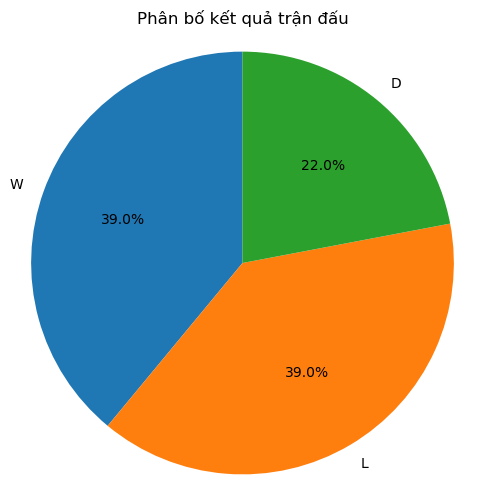

In [60]:
result_counts = data['result'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Phân bố kết quả trận đấu')
plt.axis('equal')
plt.show()

In [47]:
# Lấy mẫu ngẫu nhiên 500 hàng từ tập dữ liệu
sample_df = data.sample(n=500)

# Tính toán thống kê tổng quan của dữ liệu
summary_stats = data.describe()

In [48]:
summary_stats

,gf,ga,xg,xga,poss,attendance,sh,sot,dist,fk,pk,pkatt,season,target,venue_code,opp_code,hour,day_code
count,3734.000000,3734.000000,3734.000000,3734.000000,3734.000000,3734.000000,3734.000000,3734.000000,3734.000000,3734.000000,3734.000000,3734.000000,3734.000000,3734.00000,3734.000000,3734.000000,3734.000000,3734.000000
mean,1.389663,1.389663,1.350187,1.350187,50.001071,29409.304231,12.374130,4.123996,17.492287,0.455276,0.110070,0.137654,2020.964649,0.38993,0.500000,12.935458,16.144081,4.352437
std,1.280617,1.280617,0.798219,0.798219,12.687427,21952.420032,5.399704,2.416547,3.050652,0.670057,0.328877,0.367165,1.401401,0.48780,0.500067,7.850796,2.450063,1.803069
min,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000,0.00000,0.000000,0.000000,12.000000,0.000000
25%,0.000000,0.000000,0.700000,0.700000,40.000000,9974.000000,8.000000,2.000000,15.500000,0.000000,0.000000,0.000000,2020.000000,0.00000,0.000000,7.000000,15.000000,4.000000
50%,1.000000,1.000000,1.200000,1.200000,50.000000,30548.000000,12.000000,4.000000,17.400000,0.000000,0.000000,0.000000,2021.000000,0.00000,0.500000,13.000000,15.000000,5.000000
75%,2.000000,2.000000,1.800000,1.800000,60.000000,48948.500000,16.000000,6.000000,19.300000,1.000000,0.000000,0.000000,2022.000000,1.00000,1.000000,20.000000,19.000000,6.000000
max,9.000000,9.000000,5.900000,5.900000,82.000000,81332.000000,36.000000,15.000000,35.000000,4.000000,3.000000,3.000000,2023.000000,1.00000,1.000000,26.000000,20.000000,6.000000


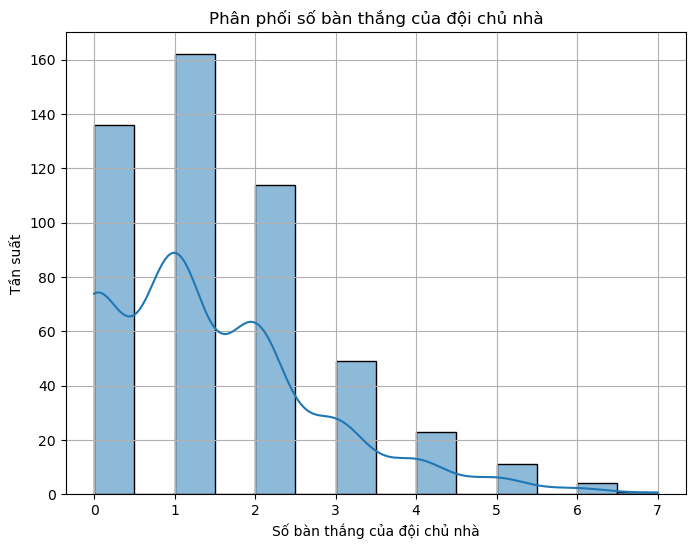

In [49]:
# Trực quan hóa phân phối của số bàn thắng của đội chủ nhà
plt.figure(figsize=(8, 6))
sns.histplot(sample_df['gf'], kde=True)
plt.xlabel('Số bàn thắng của đội chủ nhà')
plt.ylabel('Tần suất')
plt.title('Phân phối số bàn thắng của đội chủ nhà')
plt.grid(True)
plt.show()

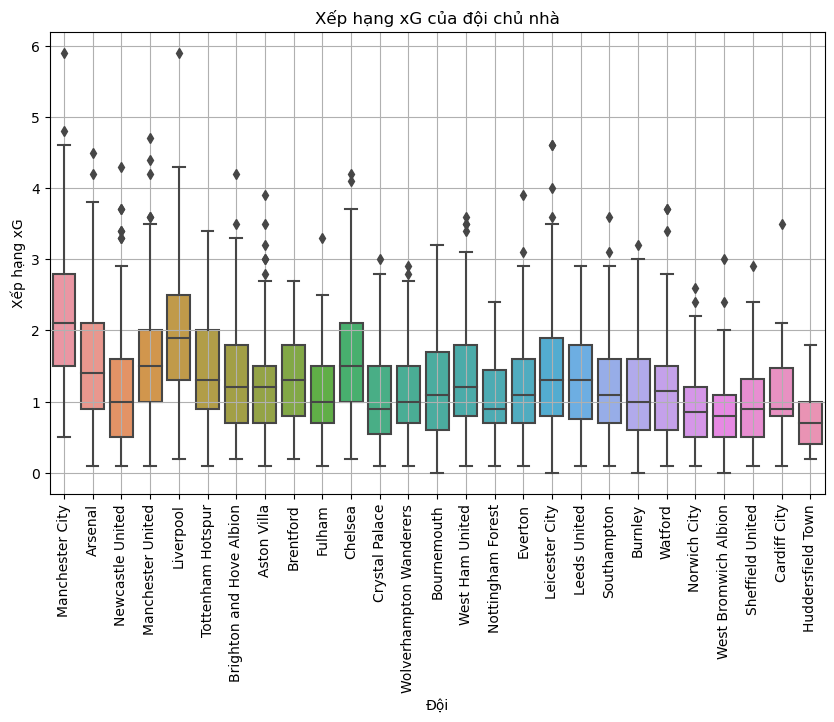

In [50]:
# Trực quan hóa biểu đồ boxplot cho xếp hạng xG của đội chủ nhà theo giải đấu
plt.figure(figsize=(10, 6))
sns.boxplot(data, x='team', y='xg')
plt.xlabel('Đội')
plt.ylabel('Xếp hạng xG')
plt.title('Xếp hạng xG của đội chủ nhà')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

C:\Users\longv\AppData\Local\Temp\ipykernel_37308\803841867.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


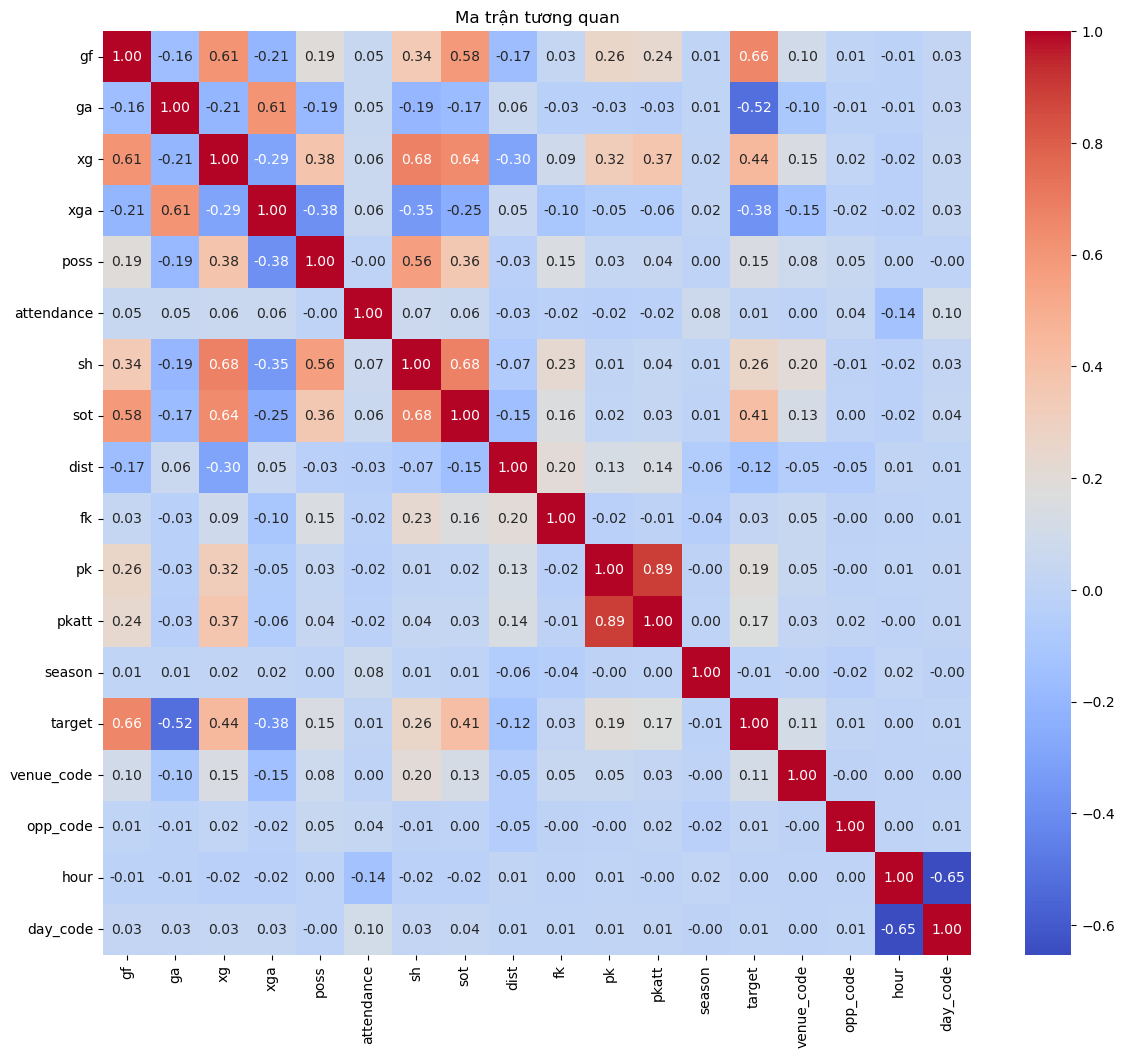

In [51]:
# Sử dụng biểu đồ heatmap để hiển thị ma trận tương quan giữa các biến
corr_matrix = data.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 10})
plt.title('Ma trận tương quan')
plt.show()

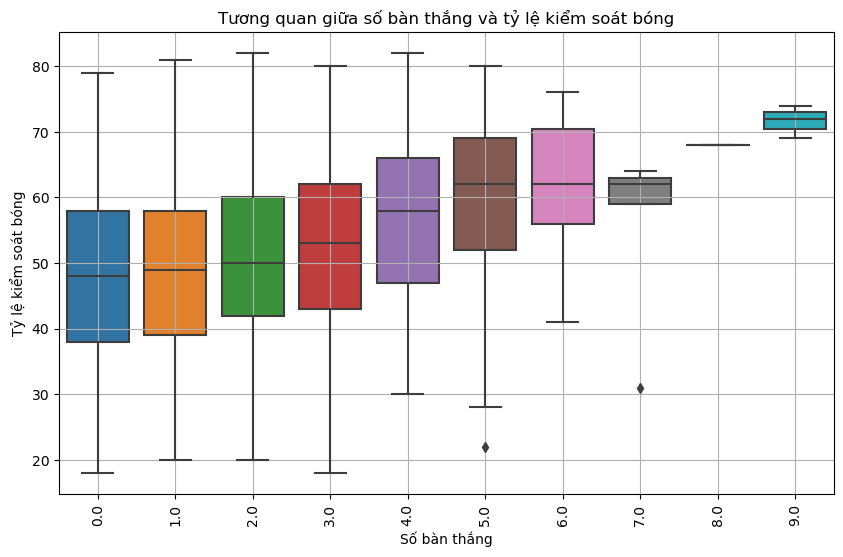

In [129]:
# Tạo biểu đồ barplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=matches, x='gf', y='poss')

# Thiết lập tiêu đề và nhãn trục
plt.xlabel('Số bàn thắng')
plt.ylabel('Tỷ lệ kiểm soát bóng')
plt.title('Tương quan giữa số bàn thắng và tỷ lệ kiểm soát bóng')

plt.xticks(rotation=90)
plt.grid(True)
plt.show()

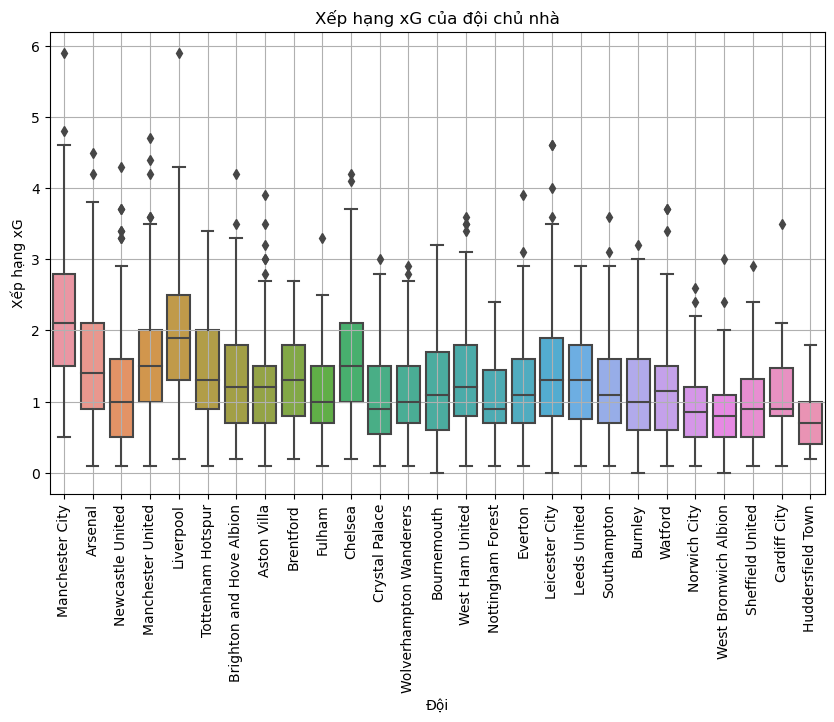

In [53]:
# Trực quan hóa biểu đồ boxplot cho xếp hạng xG của đội chủ nhà theo giải đấu
plt.figure(figsize=(10, 6))
sns.boxplot(data=matches, x='team', y='xg')
plt.xlabel('Đội')
plt.ylabel('Xếp hạng xG')
plt.title('Xếp hạng xG của đội chủ nhà')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

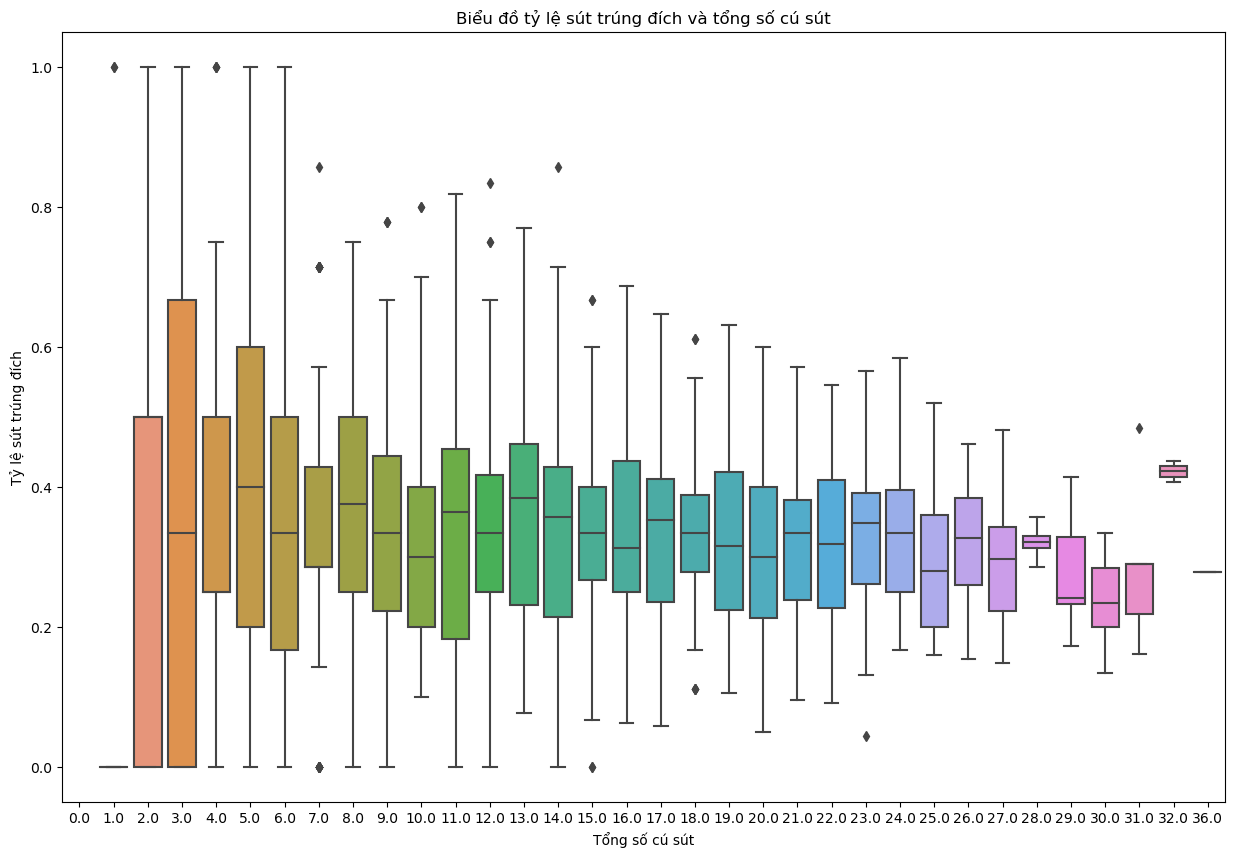

In [106]:
# Tạo biểu đồ hộp
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, x='sh', y='shot_accuracy')

# Thiết lập tiêu đề và nhãn trục
plt.xlabel('Tổng số cú sút')
plt.ylabel('Tỷ lệ sút trúng đích')
plt.title('Biểu đồ tỷ lệ sút trúng đích và tổng số cú sút')

# Hiển thị biểu đồ
plt.show()

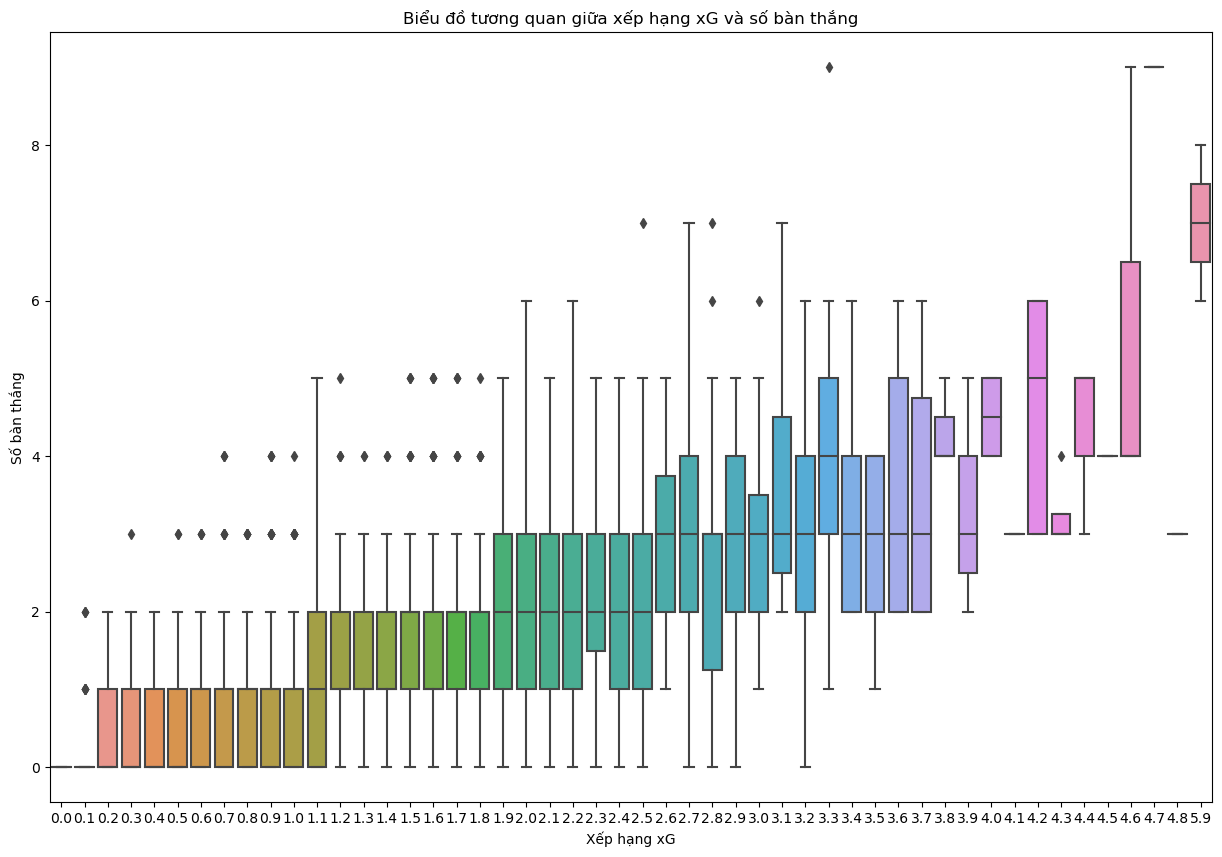

In [108]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, x='xg', y='gf')

# Thiết lập tiêu đề và nhãn trục
plt.xlabel('Xếp hạng xG')
plt.ylabel('Số bàn thắng')
plt.title('Biểu đồ tương quan giữa xếp hạng xG và số bàn thắng')

# Hiển thị biểu đồ
plt.show()

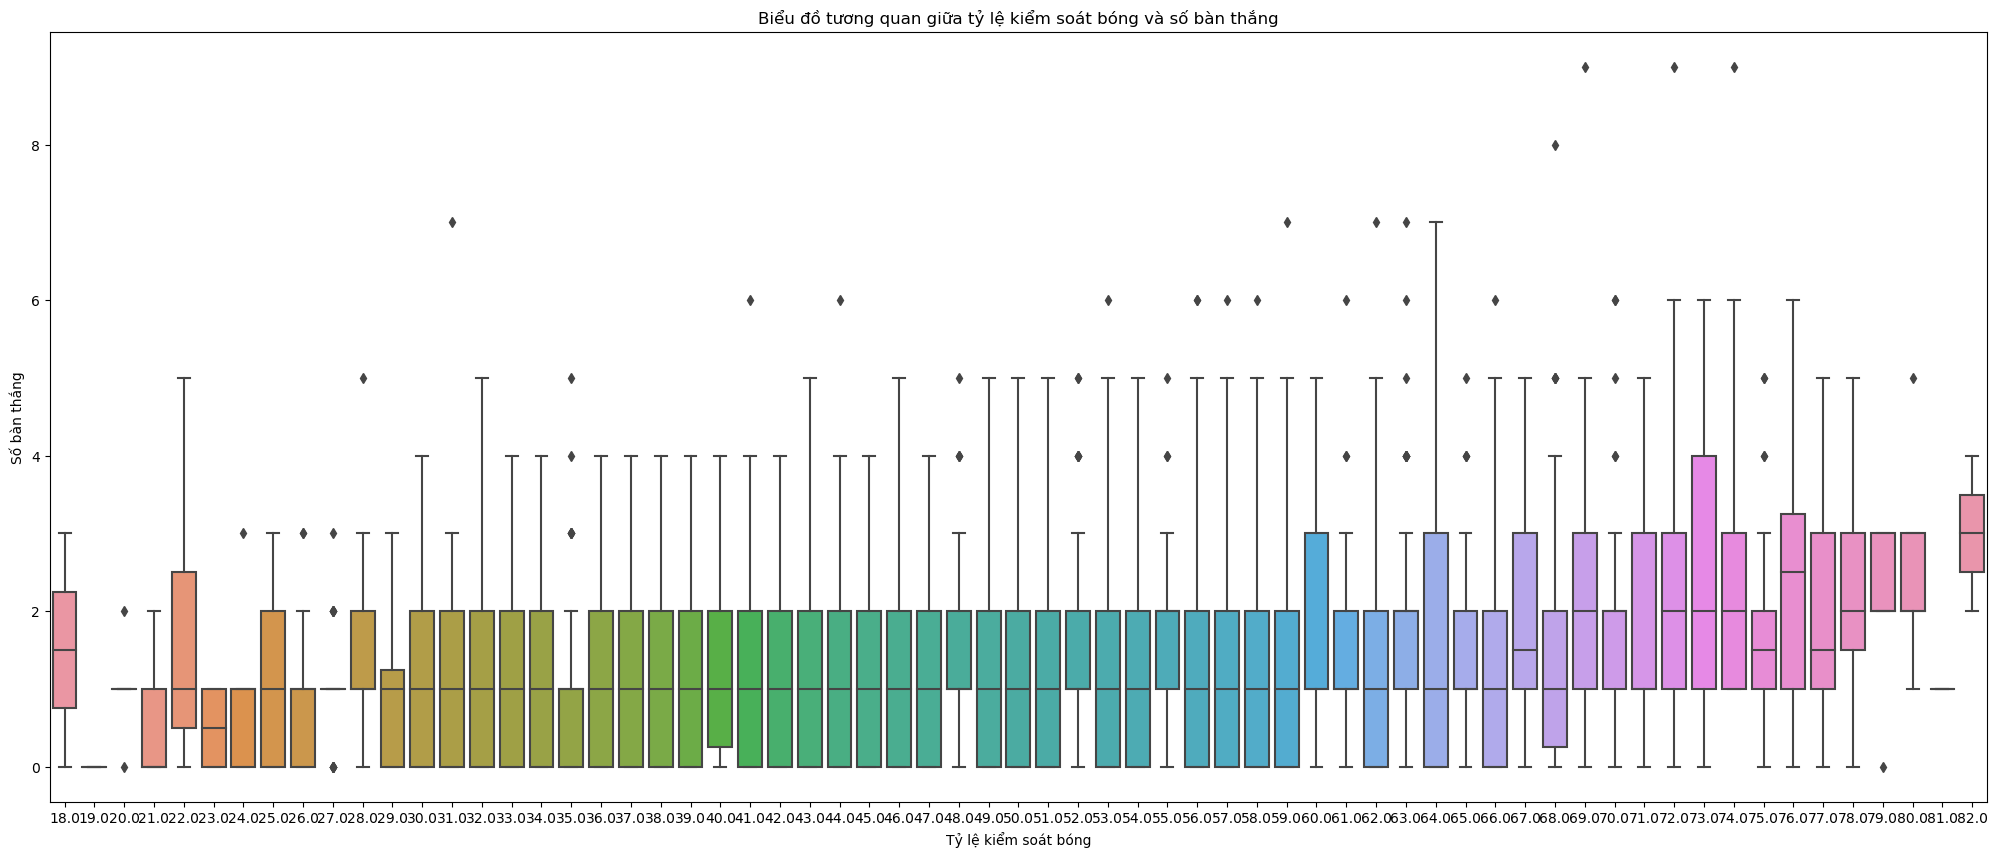

In [111]:
plt.figure(figsize=(25, 10))
sns.boxplot(data=data, x='poss', y='gf')

# Thiết lập tiêu đề và nhãn trục
plt.xlabel('Tỷ lệ kiểm soát bóng')
plt.ylabel('Số bàn thắng')
plt.title('Biểu đồ tương quan giữa tỷ lệ kiểm soát bóng và số bàn thắng')

# Hiển thị biểu đồ
plt.show()

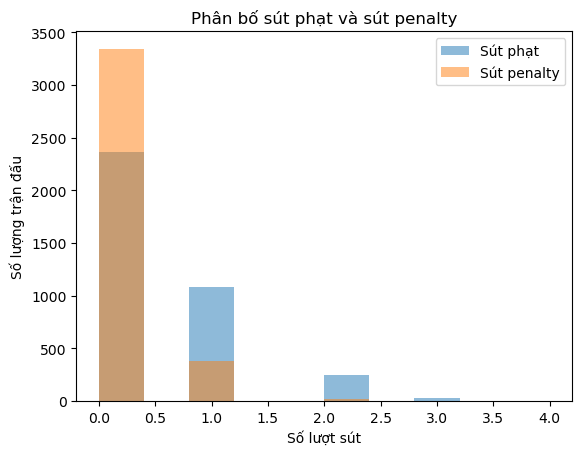

In [57]:
data[['fk', 'pk']].plot.hist(alpha=0.5, bins=10)
plt.xlabel('Số lượt sút')
plt.ylabel('Số lượng trận đấu')
plt.title('Phân bố sút phạt và sút penalty')
plt.legend(['Sút phạt', 'Sút penalty'])
plt.show()

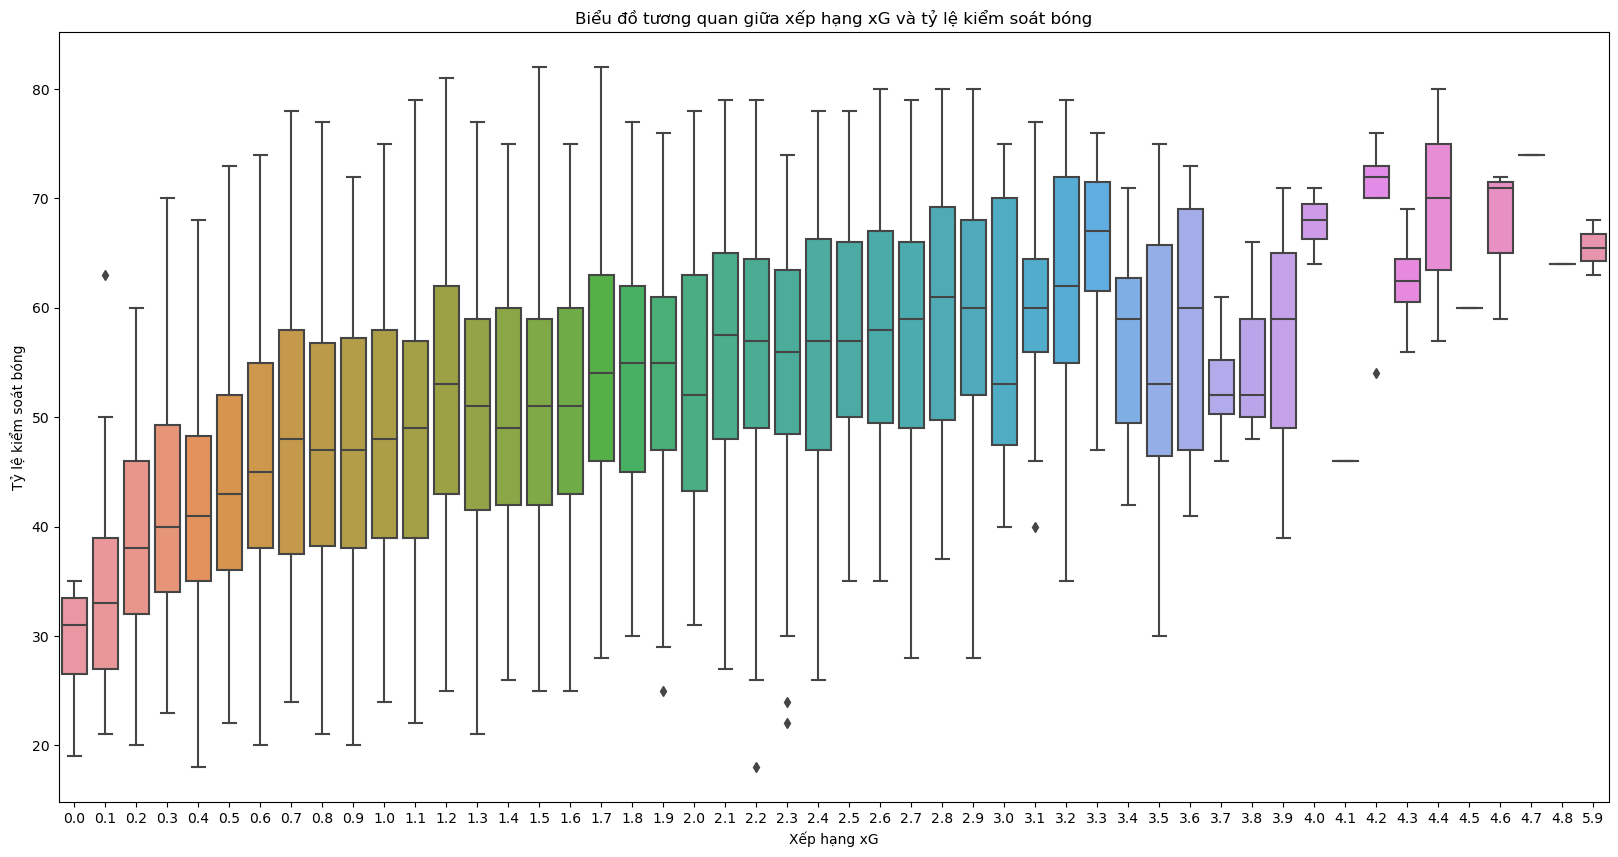

In [113]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=data, x='xg', y='poss')

# Thiết lập tiêu đề và nhãn trục
plt.xlabel('Xếp hạng xG')
plt.ylabel('Tỷ lệ kiểm soát bóng')
plt.title('Biểu đồ tương quan giữa xếp hạng xG và tỷ lệ kiểm soát bóng')

# Hiển thị biểu đồ
plt.show()

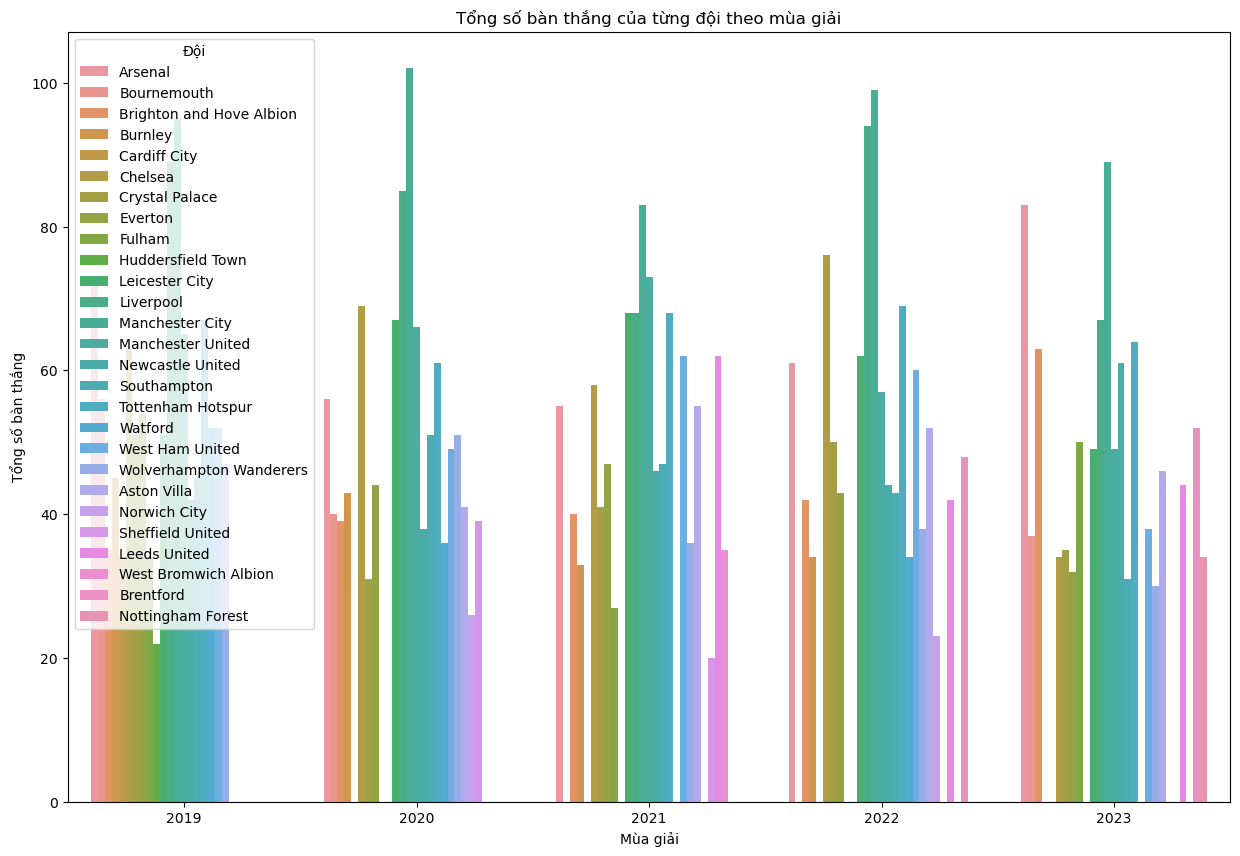

In [120]:
# Tính tổng số bàn thắng của từng đội theo mùa giải
goals_by_team = data.groupby(['season', 'team'])['gf'].sum().reset_index()

# Vẽ biểu đồ cột
plt.figure(figsize=(15, 10))
sns.barplot(data=goals_by_team, x='season', y='gf', hue='team')

# Thiết lập tiêu đề và nhãn trục
plt.xlabel('Mùa giải')
plt.ylabel('Tổng số bàn thắng')
plt.title('Tổng số bàn thắng của từng đội theo mùa giải')

# Hiển thị biểu đồ
plt.legend(title='Đội')
plt.show()

In [133]:
matches

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2022-08-07,16:30,Premier League,Matchweek 1,Sun,Away,W,2.0,0.0,West Ham,...,Match Report,NaN,13.0,1.0,18.7,1.0,1.0,1.0,2023,Manchester City
2,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,0.0,Bournemouth,...,Match Report,NaN,19.0,7.0,17.5,0.0,0.0,0.0,2023,Manchester City
3,2022-08-21,16:30,Premier League,Matchweek 3,Sun,Away,D,3.0,3.0,Newcastle Utd,...,Match Report,NaN,21.0,10.0,16.2,1.0,0.0,0.0,2023,Manchester City
4,2022-08-27,15:00,Premier League,Matchweek 4,Sat,Home,W,4.0,2.0,Crystal Palace,...,Match Report,NaN,18.0,5.0,14.1,0.0,0.0,0.0,2023,Manchester City
5,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,6.0,0.0,Nott'ham Forest,...,Match Report,NaN,17.0,9.0,14.8,0.0,0.0,0.0,2023,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,2019-04-13,12:30,Premier League,Matchweek 34,Sat,Away,L,0.0,4.0,Tottenham,...,Match Report,NaN,7.0,1.0,18.9,1.0,0.0,0.0,2019,Huddersfield Town
36,2019-04-20,15:00,Premier League,Matchweek 35,Sat,Home,L,1.0,2.0,Watford,...,Match Report,NaN,13.0,3.0,18.1,1.0,0.0,0.0,2019,Huddersfield Town
37,2019-04-26,20:00,Premier League,Matchweek 36,Fri,Away,L,0.0,5.0,Liverpool,...,Match Report,NaN,5.0,1.0,21.6,0.0,0.0,0.0,2019,Huddersfield Town
38,2019-05-05,14:00,Premier League,Matchweek 37,Sun,Home,D,1.0,1.0,Manchester Utd,...,Match Report,NaN,7.0,3.0,19.0,1.0,0.0,0.0,2019,Huddersfield Town


In [137]:
matches.info

<bound method DataFrame.info of          date   time         round  day venue result   gf   ga  \
1  2022-08-07  16:30   Matchweek 1  Sun  Away      W  2.0  0.0   
2  2022-08-13  15:00   Matchweek 2  Sat  Home      W  4.0  0.0   
3  2022-08-21  16:30   Matchweek 3  Sun  Away      D  3.0  3.0   
4  2022-08-27  15:00   Matchweek 4  Sat  Home      W  4.0  2.0   
5  2022-08-31  19:30   Matchweek 5  Wed  Home      W  6.0  0.0   
..        ...    ...           ...  ...   ...    ...  ...  ...   
35 2019-04-13  12:30  Matchweek 34  Sat  Away      L  0.0  4.0   
36 2019-04-20  15:00  Matchweek 35  Sat  Home      L  1.0  2.0   
37 2019-04-26  20:00  Matchweek 36  Fri  Away      L  0.0  5.0   
38 2019-05-05  14:00  Matchweek 37  Sun  Home      D  1.0  1.0   
39 2019-05-12  15:00  Matchweek 38  Sun  Away      D  1.0  1.0   

           opponent   xg  ...   fk   pk  pkatt season               team  \
1          West Ham  2.2  ...  1.0  1.0    1.0   2023    Manchester City   
2       Bournemouth  1.

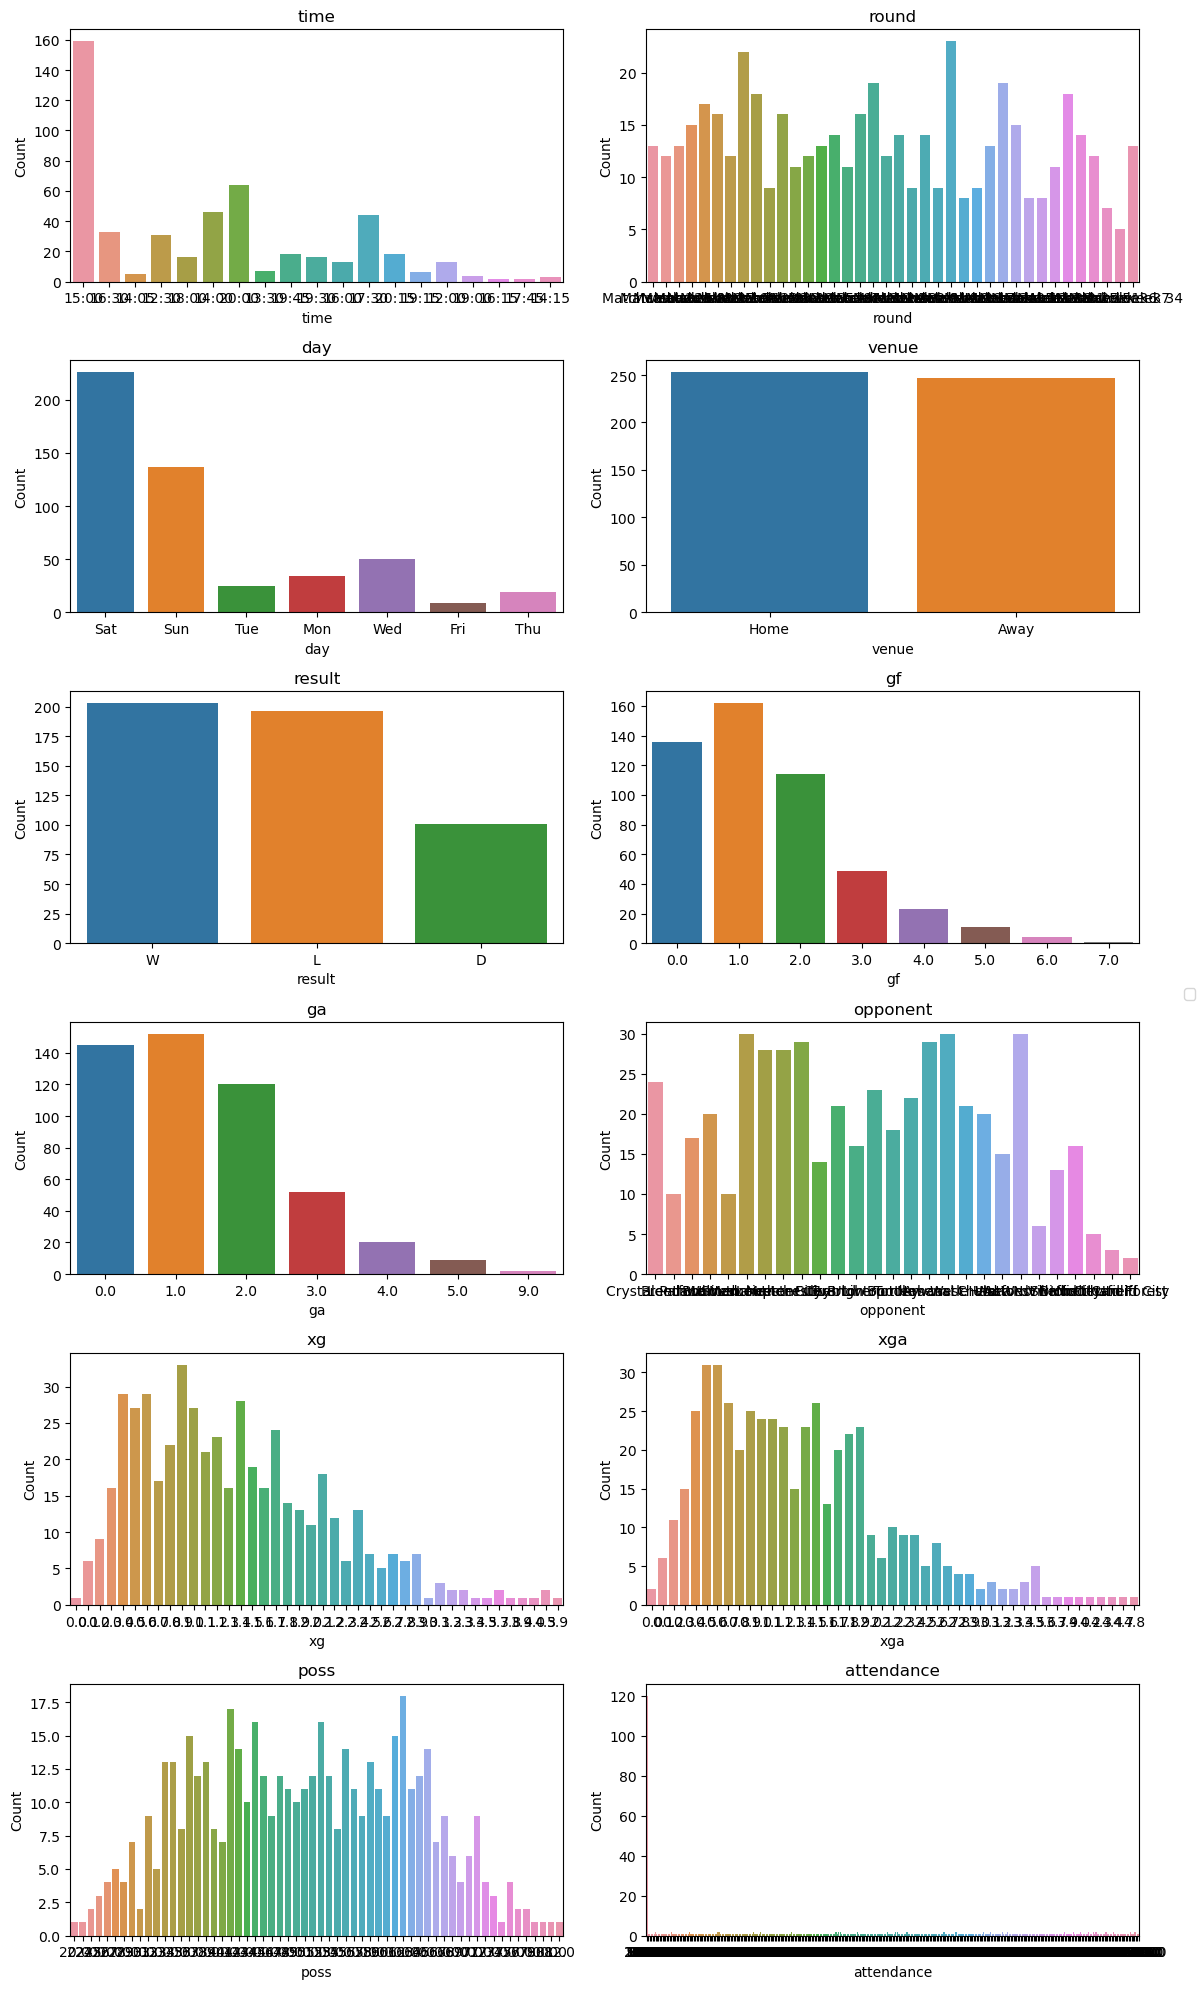

In [131]:
# Tạo subplot
fig, axs = plt.subplots(6, 2, figsize=(12, 20))

# Chỉ mục cho vị trí của biểu đồ trong subplot
row_index = 0
col_index = 0

# Lặp qua từng đặc trưng và vẽ biểu đồ
for feature, ax in zip(sample_df.keys(), axs.flat):
    # Tạo biểu đồ cột đếm số lượng
    sns.countplot(x=feature, data=sample_df, ax=ax)
    ax.set_title(feature)
    # ax.set_xlabel('')
    ax.set_ylabel('Count')

    # Kiểm tra vị trí của biểu đồ trong subplot để điều chỉnh chỉ mục
    if col_index < 2:
        col_index += 1
    else:
        row_index += 1
        col_index = 0
# Tạo bảng chú thích bên phải
handles, labels = axs[0, 1].get_legend_handles_labels()
fig.legend(handles, labels, loc='right')

# Tự động căn chỉnh và hiển thị biểu đồ
fig.tight_layout()
plt.show()